In [37]:
%matplotlib widget
import niscope as ni
import matplotlib.pyplot as plt
import numpy as np
# 275 MHz MAX

In [45]:
with ni.Session("PXI1Slot3") as session: # Name of the device
    session.channels[0].configure_vertical(range=2.0, coupling=ni.VerticalCoupling.AC)
    session.configure_horizontal_timing(min_sample_rate=250e6, min_num_pts=int(1000), ref_position=0, num_records=1, enforce_realtime=True)
    session.configure_trigger_digital(trigger_source = 'VAL_PFI_0' , slope = ni.TriggerSlope.POSITIVE, holdoff=0, delay=0)
    with session.initiate():
        waveforms = session.channels[0].fetch()
    for wfm in waveforms:
        print('Channel {0}, record {1} samples acquired: {2:,}\n'.format(wfm.channel, wfm.record, len(wfm.samples)))
a = waveforms[0].samples.tolist()
plt.figure()
plt.plot(np.arange(len(a))/250e6, a)

TypeError: configure_trigger_digital() missing 1 required positional argument: 'trigger_source'

Channel 0, record 0 samples acquired: 1,000

Channel 0, record 1 samples acquired: 1,000

Channel 0, record 2 samples acquired: 1,000



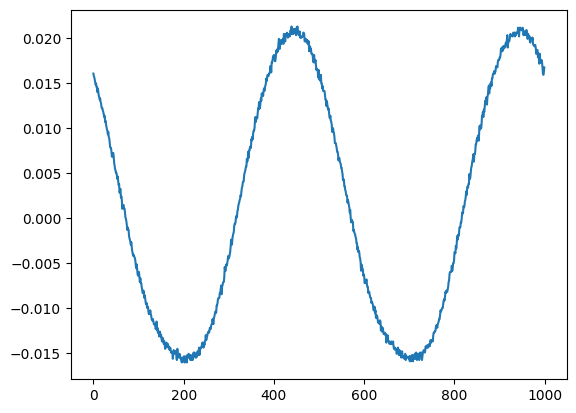

In [40]:
voltage_range = 2 # MAX 5V
n_pts = 1000
n_recs = 3

with ni.Session("PXI1Slot3") as session: # Name of the device
    session.channels[0].configure_vertical(range = voltage_range, coupling=ni.VerticalCoupling.AC)
    session.configure_horizontal_timing(min_sample_rate = 250e6, min_num_pts = n_pts, ref_position = 50.0, num_records = n_recs, enforce_realtime = True)
    with session.initiate(): # After calling this method, the digitizer leaves the Idle state and waits for a trigger
        waveforms = session.channels[0].fetch()
    for wfm in waveforms:
         print('Channel {0}, record {1} samples acquired: {2:,}\n'.format(wfm.channel, wfm.record, len(wfm.samples)))
a = waveforms[0].samples.tolist()

plt.plot(a)


In [41]:
import niscope as ni
with ni.Session("PXI1Slot3") as session: # Name of the device
    print(session.channels)

Channel 0, record 0 samples acquired: 1,000

Channel 1, record 0 samples acquired: 1,000



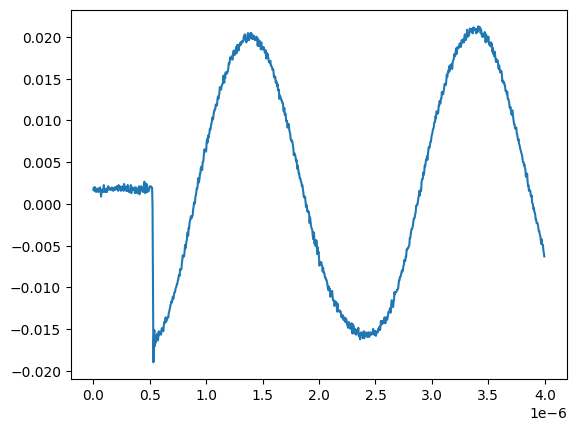

In [42]:
with ni.Session("PXI1Slot3") as session: # Name of the device
    session.channels[0].configure_vertical(range=2.0, coupling=ni.VerticalCoupling.AC)
    session.channels[1].configure_vertical(range=2.0, coupling=ni.VerticalCoupling.AC)
    session.configure_horizontal_timing(
        min_sample_rate     = 250e6, 
        min_num_pts         = int(1000), 
        ref_position        = 0, 
        num_records         = 1, 
        enforce_realtime    = True
        )

    session.configure_trigger_digital(
        trigger_source      = 'VAL_PFI_0', 
        slope               = ni.TriggerSlope.POSITIVE, 
        holdoff             = 0, 
        delay               = 0
        )

    with session.initiate():
        waveforms = session.channels[0, 1].fetch()
    for wfm in waveforms:
        print('Channel {0}, record {1} samples acquired: {2:,}\n'.format(wfm.channel, wfm.record, len(wfm.samples)))
a = waveforms[0].samples.tolist()
plt.figure()
plt.plot(np.arange(len(a))/250e6, a)